### Importação dos dados



In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URLs dos dados das 4 lojas
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carregar dados
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Adicionar identificador de loja
loja1['Loja'] = 1
loja2['Loja'] = 2
loja3['Loja'] = 3
loja4['Loja'] = 4

# Combinar todos os dados
dados_completos = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# Converter data para datetime
dados_completos['Data da Compra'] = pd.to_datetime(dados_completos['Data da Compra'], format='%d/%m/%Y')

# Caso queira criar coluna de faturamento total (Preço + Frete)
# dados_completos['Faturamento_Total'] = dados_completos['Preço'] + dados_completos['Frete']

# Exemplo
loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,1


#1. Análise do faturamento


In [24]:
# Faturamento total por loja
faturamento_por_loja = dados_completos.groupby('Loja')['Preço'].sum().reset_index()
faturamento_por_loja.columns = ['Loja', 'Preço']
faturamento_por_loja = faturamento_por_loja.sort_values('Preço', ascending=False)

print("=== FATURAMENTO TOTAL POR LOJA ===")
print(faturamento_por_loja)

# Número de vendas por loja
vendas_por_loja = dados_completos.groupby('Loja').size().reset_index(name='Número de Vendas')
vendas_por_loja = vendas_por_loja.sort_values('Número de Vendas', ascending=False)

print("\n=== NÚMERO DE VENDAS POR LOJA ===")
print(vendas_por_loja)

# Faturamento médio por venda
faturamento_medio = dados_completos.groupby('Loja')['Preço'].mean().reset_index()
faturamento_medio.columns = ['Loja', 'Preço']
faturamento_medio = faturamento_medio.sort_values('Preço', ascending=False)

print("\n=== FATURAMENTO MÉDIO POR VENDA ===")
print(faturamento_medio)

=== FATURAMENTO TOTAL POR LOJA ===
   Loja       Preço
0     1  1534509.12
1     2  1488459.06
2     3  1464025.03
3     4  1384497.58

=== NÚMERO DE VENDAS POR LOJA ===
   Loja  Número de Vendas
0     1              2359
1     2              2359
2     3              2359
3     4              2358

=== FATURAMENTO MÉDIO POR VENDA ===
   Loja       Preço
0     1  650.491361
1     2  630.970352
2     3  620.612560
3     4  587.149101


In [25]:
# Resumo consolidado
resumo = pd.merge(faturamento_por_loja, vendas_por_loja, on='Loja')
resumo = pd.merge(resumo, faturamento_medio, on='Loja')
resumo = resumo.rename(columns={
    'Preço_x': 'Fatur Total',
    'Preço_y': 'Fatur Médio'
})
resumo['Participação no Fatur (%)'] = (resumo['Fatur Total'] / resumo['Fatur Total'].sum()) * 100

print("\n=== RESUMO CONSOLIDADO ===")
print(resumo.round(2))


=== RESUMO CONSOLIDADO ===
   Loja  Fatur Total  Número de Vendas  Fatur Médio  Participação no Fatur (%)
0     1   1534509.12              2359       650.49                      26.13
1     2   1488459.06              2359       630.97                      25.35
2     3   1464025.03              2359       620.61                      24.93
3     4   1384497.58              2358       587.15                      23.58


# 2. Vendas por Categoria


In [26]:
produtos_por_categoria = dados_completos.groupby(['Loja', 'Categoria do Produto']).size().reset_index(name='Qtd Produtos').sort_values('Qtd Produtos', ascending=False)
produtos_populares_loja1 = produtos_por_categoria.loc[produtos_por_categoria['Loja'] == 1]
produtos_populares_loja2 = produtos_por_categoria.loc[produtos_por_categoria['Loja'] == 2]
produtos_populares_loja3 = produtos_por_categoria.loc[produtos_por_categoria['Loja'] == 3]
produtos_populares_loja4 = produtos_por_categoria.loc[produtos_por_categoria['Loja'] == 4]

print("=== PRODUTOS MAIS VENDIDOS POR LOJA ===\n")
print(produtos_populares_loja1, "\n")
print(produtos_populares_loja2, "\n")
print(produtos_populares_loja3, "\n")
print(produtos_populares_loja4, "\n")


=== PRODUTOS MAIS VENDIDOS POR LOJA ===

   Loja   Categoria do Produto  Qtd Produtos
6     1                 moveis           465
2     1            eletronicos           448
0     1             brinquedos           324
1     1       eletrodomesticos           312
3     1        esporte e lazer           284
4     1  instrumentos musicais           182
5     1                 livros           173
7     1  utilidades domesticas           171 

    Loja   Categoria do Produto  Qtd Produtos
14     2                 moveis           442
10     2            eletronicos           422
8      2             brinquedos           313
9      2       eletrodomesticos           305
11     2        esporte e lazer           275
12     2  instrumentos musicais           224
13     2                 livros           197
15     2  utilidades domesticas           181 

    Loja   Categoria do Produto  Qtd Produtos
22     3                 moveis           499
18     3            eletronicos           45

In [27]:
# Faturamento total por loja por categoria
faturamento_categoria_loja = (
    dados_completos.groupby(['Loja', 'Categoria do Produto'])['Preço']
         .sum()
)
faturamento_categoria_loja = faturamento_categoria_loja.reset_index()
faturamento_categoria_loja = faturamento_categoria_loja.rename(columns={'Preço': 'Fatur por Categoria'})
faturamento_categoria_loja = faturamento_categoria_loja.merge(
    produtos_por_categoria, on=['Loja', 'Categoria do Produto']
)

faturamento_categoria_loja['Fatur Medio Categoria'] = (faturamento_categoria_loja['Fatur por Categoria'] / faturamento_categoria_loja['Qtd Produtos'])

faturamento_categoria_loja = faturamento_categoria_loja.sort_values('Fatur Medio Categoria', ascending=False)


print("=== FATURAMENTO TOTAL POR LOJA POR CATEGORIA ===\n")
print('Loja 1:\n', faturamento_categoria_loja.loc[faturamento_categoria_loja['Loja'] == 1].drop(columns='Loja').reset_index(drop=True), "\n")
print('Loja 2:\n', faturamento_categoria_loja.loc[faturamento_categoria_loja['Loja'] == 2].drop(columns='Loja').reset_index(drop=True), "\n")
print('Loja 3:\n', faturamento_categoria_loja.loc[faturamento_categoria_loja['Loja'] == 3].drop(columns='Loja').reset_index(drop=True), "\n")
print('Loja 4:\n', faturamento_categoria_loja.loc[faturamento_categoria_loja['Loja'] == 4].drop(columns='Loja').reset_index(drop=True), "\n")


=== FATURAMENTO TOTAL POR LOJA POR CATEGORIA ===

Loja 1:
     Categoria do Produto  Fatur por Categoria  Qtd Produtos  \
0       eletrodomesticos            484913.36           312   
1            eletronicos            572659.23           448   
2  instrumentos musicais            121731.69           182   
3                 moveis            250178.11           465   
4        esporte e lazer             52387.55           284   
5  utilidades domesticas             16931.48           171   
6             brinquedos             23993.78           324   
7                 livros             11713.92           173   

   Fatur Medio Categoria  
0            1554.209487  
1            1278.257210  
2             668.855440  
3             538.017441  
4             184.463204  
5              99.014503  
6              74.054877  
7              67.710520   

Loja 2:
     Categoria do Produto  Fatur por Categoria  Qtd Produtos  \
0       eletrodomesticos            464758.13           

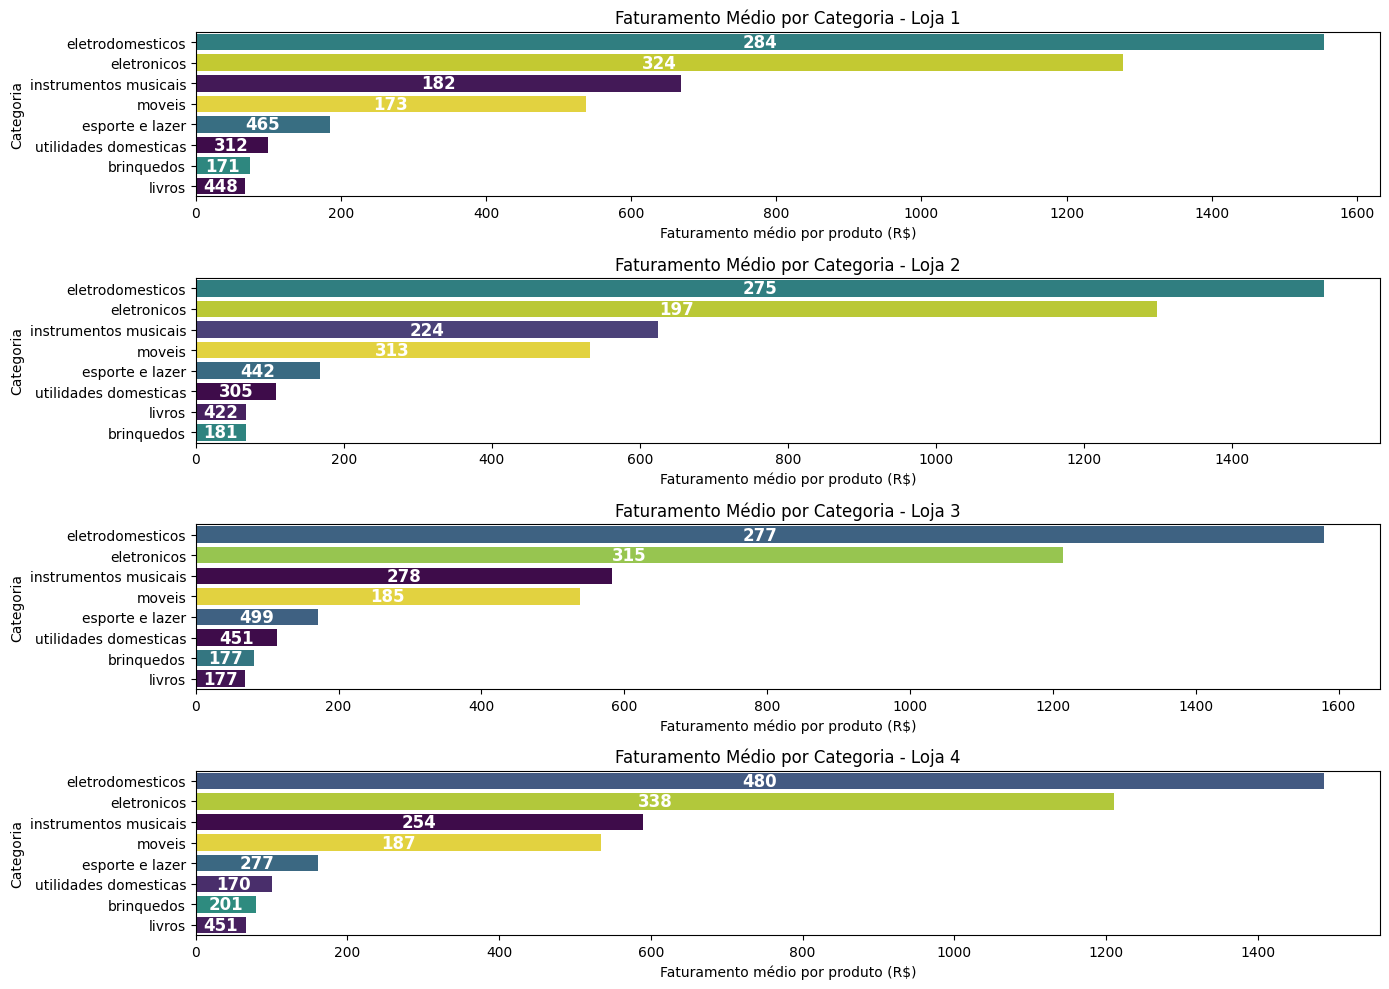

In [28]:
plt.figure(figsize=(14, 10))

for i, loja in enumerate(sorted(faturamento_categoria_loja['Loja'].unique()), 1):
    plt.subplot(4, 1, i)
    dados_loja = faturamento_categoria_loja[faturamento_categoria_loja['Loja'] == loja]
    # Ordenar categorias para melhor visualização, do maior para o menor faturamento médio
    dados_loja = dados_loja.sort_values('Fatur Medio Categoria', ascending=False)
    ax = sns.barplot(
        x='Fatur Medio Categoria',
        y='Categoria do Produto',
        data=dados_loja,
        palette='viridis',
        hue='Qtd Produtos',
        legend=False
    )
    # Adiciona a quantidade de itens dentro da barra
    for bar, qtd in zip(ax.patches, dados_loja['Qtd Produtos']):
        ax.text(
            bar.get_width() / 2,          # Posição X central da barra
            bar.get_y() + bar.get_height() / 2,  # Posição Y central da barra
            str(qtd),
            ha='center',
            va='center',
            color='white',
            fontweight='bold',
            fontsize=12
        )
    plt.title(f'Faturamento Médio por Categoria - Loja {loja}')
    plt.xlabel('Faturamento médio por produto (R$)')
    plt.ylabel('Categoria')

plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [29]:
# Avaliações médias por loja
avaliacao_media_loja = (
    dados_completos.groupby('Loja')['Avaliação da compra']
         .mean().reset_index().sort_values('Avaliação da compra', ascending=False).reset_index(drop=True).round(2)
)

print("\n=== AVALIAÇÃO MÉDIA POR LOJA ===")
print(avaliacao_media_loja)


=== AVALIAÇÃO MÉDIA POR LOJA ===
   Loja  Avaliação da compra
0     3                 4.05
1     2                 4.04
2     4                 4.00
3     1                 3.98


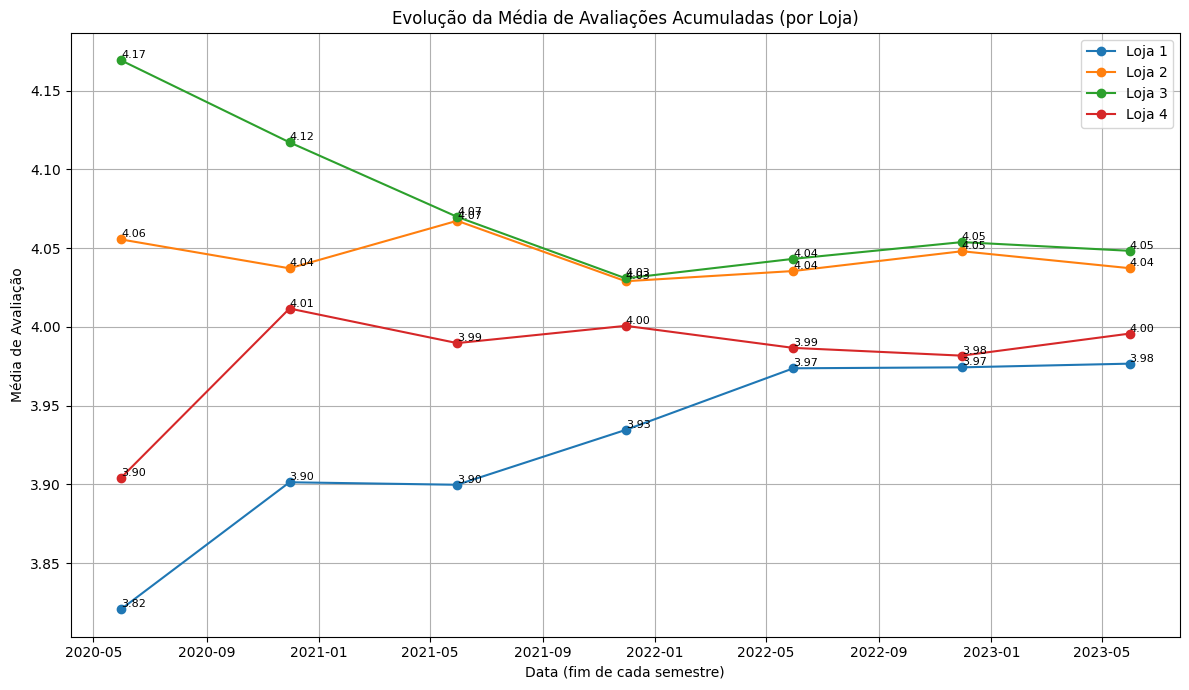

In [30]:
# Gerar lista de semestres para cada loja
resultados = []
for loja in sorted(dados_completos['Loja'].unique()):
    df_loja = dados_completos[dados_completos['Loja'] == loja].copy()
    semestres = pd.date_range(
        start=df_loja['Data da Compra'].min(),
        end=df_loja['Data da Compra'].max(),
        freq='6MS'
    )
    # Calcular média acumulada até cada semestre
    for semestre in semestres:
        mask = df_loja['Data da Compra'] <= semestre + pd.offsets.MonthEnd(5)
        media_ate_semestre = df_loja.loc[mask, 'Avaliação da compra'].mean()
        resultados.append({
            'Loja': loja,
            'Semestre_Fim': (semestre + pd.offsets.MonthEnd(5)),
            'Média Acumulada': media_ate_semestre
        })

df_evolucao = pd.DataFrame(resultados)

# Gráfico de linhas por loja
plt.figure(figsize=(12, 7))
for loja in sorted(df_evolucao['Loja'].unique()):
    dados_loja = df_evolucao[df_evolucao['Loja'] == loja]
    plt.plot(
        dados_loja['Semestre_Fim'],
        dados_loja['Média Acumulada'],
        marker='o',
        label=f'Loja {loja}'
    )
    for x, y in zip(dados_loja['Semestre_Fim'], dados_loja['Média Acumulada']):
        plt.text(x, y, f'{y:.2f}', va='bottom', fontsize=8)

plt.title('Evolução da Média de Avaliações Acumuladas (por Loja)')
plt.xlabel('Data (fim de cada semestre)')
plt.ylabel('Média de Avaliação')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [31]:
# Faturamento total por loja por produto

qtd_produtos_vendidos = dados_completos.groupby(['Loja', 'Produto']).size().reset_index(name='Qtd')

faturamento_produto_loja = (dados_completos.groupby(['Loja', 'Produto'])['Preço'].sum())
faturamento_produto_loja = faturamento_produto_loja.reset_index()
faturamento_produto_loja = faturamento_produto_loja.rename(columns={'Preço': 'Fatur por Produto'})
faturamento_produto_loja = faturamento_produto_loja.merge(qtd_produtos_vendidos, on=['Loja', 'Produto'])

faturamento_produto_loja['Fatur Medio Un'] = (faturamento_produto_loja['Fatur por Produto'] / faturamento_produto_loja['Qtd']).round(2)

faturamento_produto_loja = faturamento_produto_loja.sort_values('Qtd', ascending=False)


print("=== FATURAMENTO TOTAL POR LOJA POR CATEGORIA ===\n")
print('Loja 1:\n', faturamento_produto_loja.loc[faturamento_produto_loja['Loja'] == 1].drop(columns='Loja').reset_index(drop=True), "\n")
print('Loja 2:\n', faturamento_produto_loja.loc[faturamento_produto_loja['Loja'] == 2].drop(columns='Loja').reset_index(drop=True), "\n")
print('Loja 3:\n', faturamento_produto_loja.loc[faturamento_produto_loja['Loja'] == 3].drop(columns='Loja').reset_index(drop=True), "\n")
print('Loja 4:\n', faturamento_produto_loja.loc[faturamento_produto_loja['Loja'] == 4].drop(columns='Loja').reset_index(drop=True), "\n")


=== FATURAMENTO TOTAL POR LOJA POR CATEGORIA ===

Loja 1:
                         Produto  Fatur por Produto  Qtd  Fatur Medio Un
0                 Guarda roupas           39282.78   60          654.71
1                   Micro-ondas           46348.89   60          772.48
2                 TV Led UHD 4K          189534.28   60         3158.90
3            Secadora de roupas           78749.73   58         1357.75
4              Blocos de montar            2487.74   56           44.42
5                        Cômoda           20905.92   56          373.32
6              Bola de basquete            3666.88   55           66.67
7                     Geladeira          149524.28   54         2768.97
8                  Copo térmico            3284.68   54           60.83
9                    Impressora           21884.23   54          405.26
10                    Bicicleta           36592.38   54          677.64
11                      Bateria           50258.34   53          948.27
12   

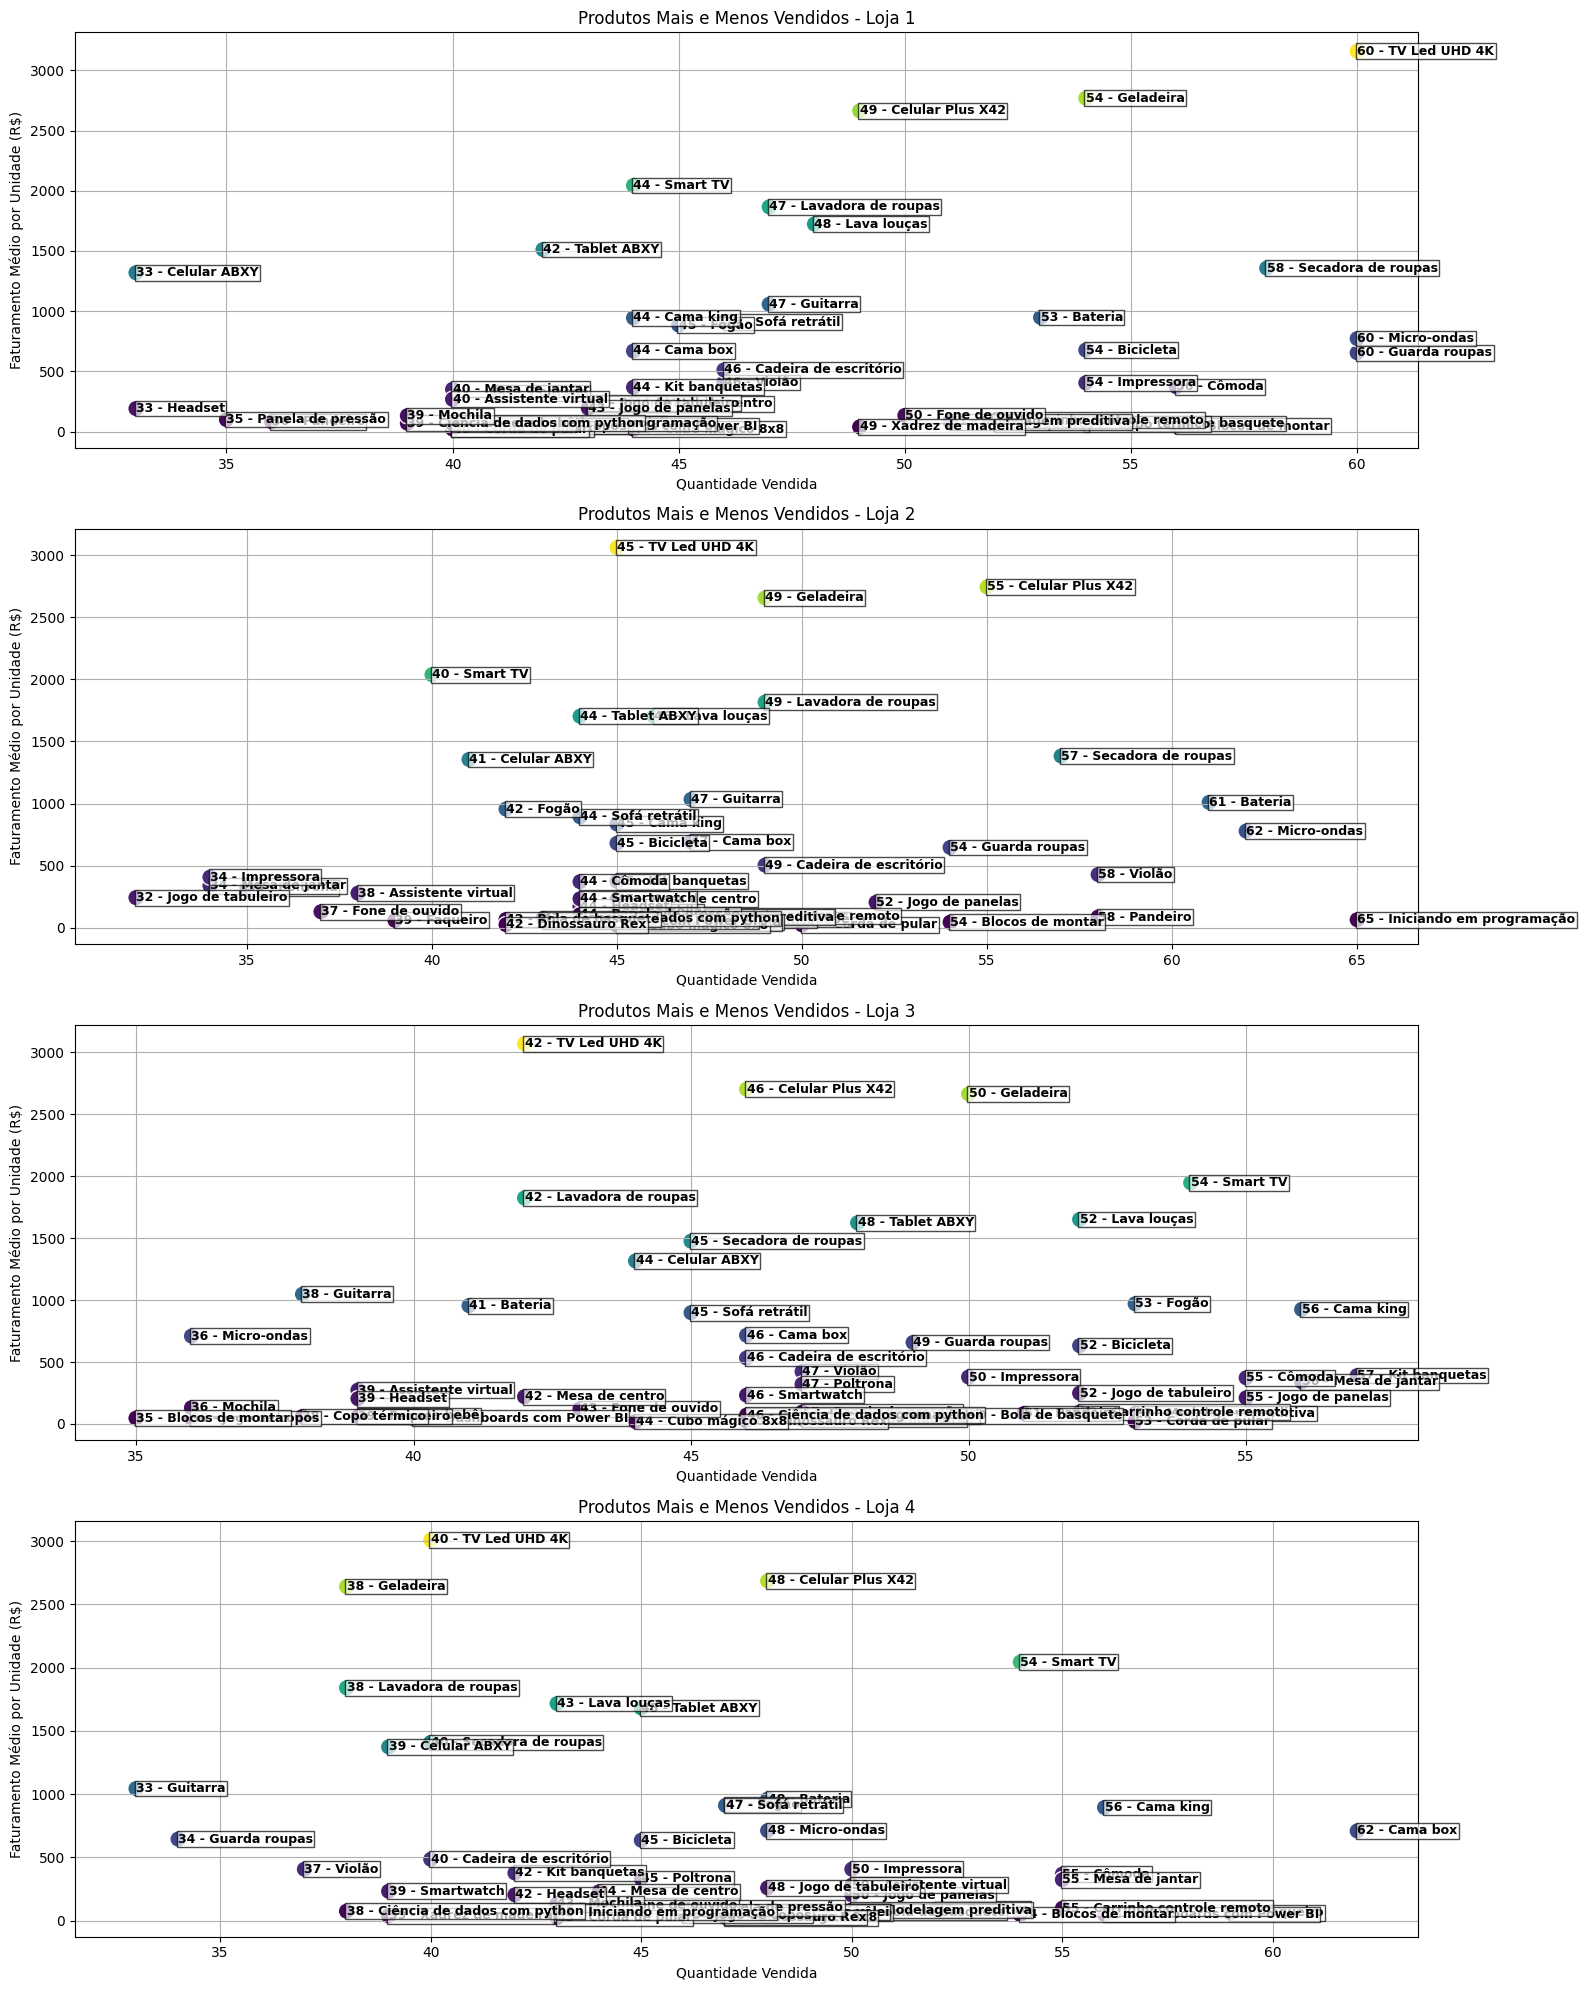

In [32]:
# Gráfico de dispersão dos produtos mais e menos vendidos por loja

plt.figure(figsize=(16, 20))

for i, loja in enumerate(sorted(faturamento_produto_loja['Loja'].unique()), 1):
    plt.subplot(4, 1, i)
    dados_loja = faturamento_produto_loja[faturamento_produto_loja['Loja'] == loja]
    dados_loja = dados_loja.sort_values('Qtd', ascending=False)

    ax = sns.scatterplot(
        x='Qtd', y='Fatur Medio Un',
        data=dados_loja,
        hue='Fatur Medio Un',
        palette='viridis',
        legend=False,
        s=140
    )

    # Adiciona a quantidade dentro de cada ponto
    for idx, row in dados_loja.iterrows():
        ax.text(
            row['Qtd'], row['Fatur Medio Un'],
            f"{row['Qtd']} - {row['Produto']}",    # <-- Aqui o formato desejado
            ha='left', va='center',
            color='black', fontsize=9, fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.7, pad=1)
        )

    plt.title(f'Produtos Mais e Menos Vendidos - Loja {loja}')
    plt.xlabel('Quantidade Vendida')
    plt.ylabel('Faturamento Médio por Unidade (R$)')
    plt.grid(True)

plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


In [33]:
# Frete médio por loja
frete_medio_loja = (
    dados_completos.groupby('Loja')['Frete']
         .mean().reset_index()
)
frete_medio_loja.columns = ['Loja', 'Frete Médio']

frete_total_loja = (
    dados_completos.groupby('Loja')['Frete']
         .sum().reset_index().sort_values('Frete', ascending=False).reset_index(drop=True)
)
frete_total_loja.columns = ['Loja', 'Frete Total']

frete_medio_loja = pd.merge(frete_medio_loja, frete_total_loja, on='Loja')
resumo_frete = pd.merge(frete_medio_loja, resumo, on=['Loja']).drop(columns=['Número de Vendas', 'Fatur Médio'])
resumo_frete['Fatur - Frete'] = resumo_frete['Fatur Total'] - resumo_frete['Frete Total']
resumo_frete['Participação no Fatur - Frete (%)'] = (resumo_frete['Fatur - Frete'] / resumo_frete['Fatur - Frete'].sum()) * 100

print("\n=== GASTO COM FRETE POR LOJA ===")
print(resumo_frete.round(2))


=== GASTO COM FRETE POR LOJA ===
   Loja  Frete Médio  Frete Total  Fatur Total  Participação no Fatur (%)  \
0     1        34.69     81837.97   1534509.12                      26.13   
1     2        33.62     79314.16   1488459.06                      25.35   
2     3        33.07     78022.66   1464025.03                      24.93   
3     4        31.28     73755.88   1384497.58                      23.58   

   Fatur - Frete  Participação no Fatur - Frete (%)  
0     1452671.15                              26.13  
1     1409144.90                              25.35  
2     1386002.37                              24.93  
3     1310741.70                              23.58  


# Relatório

Introdução

Este relatório analisa os dados operacionais de quatro lojas do Senhor João para apoiar a decisão sobre qual unidade deve ser vendida. A análise abrange dados de janeiro de 2020 a março de 2023 (1.185 dias) e inclui 9.435 transações distribuídas equilibradamente entre as lojas. Os critérios avaliados incluem faturamento total, performance das categorias de produtos, satisfação dos clientes, produtos mais vendidos e frete médio.

---
**1. Faturamento Total das Lojas**

A análise do faturamento considerou exclusivamente o preço de venda dos produtos, excluindo o valor do frete:



```
Loja      Faturamento Total (R$)     Participação (%)

Loja 1    1.534.509,12               26,13%

Loja 2    1.488.459,06               25,35%

Loja 3    1.464.025,03               24,93%

Loja 4    1.384.497,58               23,58%
```




Conclusão: A Loja 1 apresenta o maior faturamento total, com diferença de R$ 150.011,54 em relação à Loja 4 (pior performance). A distribuição é relativamente equilibrada, com diferenças pequenas entre as lojas.

---
**2. Categorias de Produtos Mais e Menos Vendidas**
```
A análise das 8 categorias disponíveis revelou o seguinte ranking por faturamento total:

Categoria               Faturamento Total (R$)    Melhor Loja       Pior Loja

Eletrônicos             2.214.099,72              Loja 1            Loja 4

Eletrodomésticos        1.766.337,03              Loja 1            Loja 4

Móveis                  1.010.214,00              Loja 3            Loja 2

Instrumentos Musicais   465.029,67                Loja 2            Loja 4

Esporte e Lazer	        190.635,39                Loja 1            Loja 4

Brinquedos              98.140,86                 Loja 4            Loja 2

Utilidades Domésticas   76.773,38                 Loja 4            Loja 1

Livros                  50.260,74                 Loja 2            Loja 1
```

Conclusão: As três categorias principais (Eletrônicos, Eletrodomésticos e Móveis) representam 85% do faturamento total. A Loja 1 domina as duas principais categorias, enquanto a Loja 4 tem o pior desempenho nas categorias mais lucrativas.

---
**3. Avaliações Médias dos Clientes por Loja**

A satisfação dos clientes foi medida pela média das avaliações (escala de 1 a 5):
```
Loja       Avaliação Média	Ranking
Loja 3     4,05	            1º
Loja 2     4,04	            2º
Loja 4     4,00	            3º
Loja 1     3,98	            4º
```
Conclusão: A diferença nas avaliações é pequena (0,07 pontos entre a melhor e pior), mas a Loja 3 lidera em satisfação dos clientes, seguida pela Loja 2. A Loja 1, apesar do maior faturamento, tem a pior avaliação média.

---
**4. Produtos Mais e Menos Vendidos**


```
Produtos mais vendidos por quantidade:

Loja 1: TV Led UHD 4K (60 vendas), Micro-ondas (60 vendas)

Loja 2: Iniciando em programação (65 vendas), Micro-ondas (62 vendas)

Loja 3: Kit banquetas (57 vendas), Mesa de jantar (56 vendas)

Loja 4: Cama box (62 vendas), Faqueiro (59 vendas)

Produtos com maior faturamento:

Loja 1: TV Led UHD 4K (R$ 189.534), Geladeira (R$ 149.524)

Loja 2: Celular Plus X42 (R$ 150.968), TV Led UHD 4K (R$ 137.833)

Loja 3: Geladeira (R$ 133.186), TV Led UHD 4K (R$ 128.892)

Loja 4: Celular Plus X42 (R$ 128.930), TV Led UHD 4K (R$ 120.393)
```
Conclusão: Produtos eletrônicos de alto valor (TVs, celulares, geladeiras) dominam o faturamento em todas as lojas, mas a Loja 1 tem os melhores resultados nos produtos premium.

---
**5. Frete Médio de Cada Loja**
```
Loja    Frete Médio (R$)    Ranking
Loja 4  31,28               1º (melhor)
Loja 3  33,07               2º
Loja 2  33,62               3º
Loja 1  34,69               4º (pior)
```
Conclusão: A Loja 4 tem o menor frete médio, oferecendo vantagem competitiva nos preços finais. A Loja 1 tem o maior frete médio, o que pode impactar a competitividade.



---


Conclusão e Recomendação

Recomendação: A Loja 4 deve ser vendida.

```

Justificativa:

Pior performance financeira:

A Loja 4 tem o menor faturamento total (1.384.497), representando 150.011 a menos que a líder.

Fraca performance nas categorias principais:

É a pior loja nas três categorias mais lucrativas (Eletrônicos, Eletrodomésticos e Móveis), que representam 85% do faturamento total.

Menor potencial de crescimento:

Produtos de menor valor agregado e baixa performance nas categorias de maior margem.

Impacto limitado na operação:

Embora tenha o melhor frete médio, essa vantagem não compensa as deficiências nas outras métricas.

```